In [ ]:
from google.colab import files
uploaded = files.upload()


Saving glass.csv to glass.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
glassdata = pd.read_csv(r'glass.csv')

In [ ]:
glassdata.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glassdata.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
glassdata.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

<Axes: >

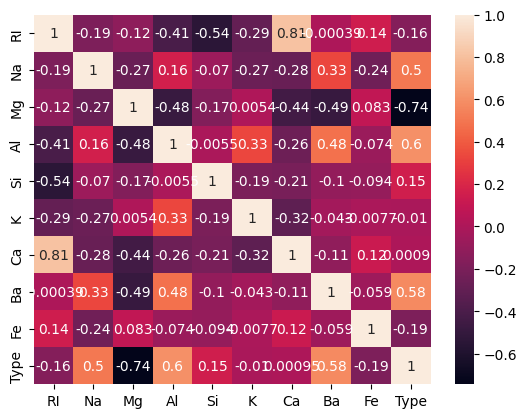

In [ ]:
sns.heatmap(glassdata.corr(), annot = True)

In [ ]:
# Split the dataset into training and testing datasets
X = glassdata.drop('Type', axis=1)
y = glassdata['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.shape

(214, 9)

In [ ]:
y.shape

(214,)

In [ ]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [ ]:
# Build the KNN model
k = 5  # number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model using classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.84      0.67        19
           2       0.65      0.57      0.60        23
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.25      0.33      0.29         3
           7       0.80      0.80      0.80        10

    accuracy                           0.58        65
   macro avg       0.38      0.42      0.39        65
weighted avg       0.53      0.58      0.55        65

[[16  2  1  0  0  0]
 [ 7 13  1  0  2  0]
 [ 4  0  0  0  0  0]
 [ 1  4  0  0  0  1]
 [ 0  1  0  0  1  1]
 [ 1  0  0  0  1  8]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Find the optimal value of k using cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
# List of values of k to try
k_list = list(range(1, 31))

# List to store the cross-validation scores
cv_scores = []

# Perform 10-fold cross-validation for each value of k
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=6, scoring='accuracy')
    cv_scores.append(scores.mean())


In [ ]:
# Find the optimal k that gives the highest cross-validation score
optimal_k = k_list[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is", optimal_k)

The optimal number of neighbors is 1


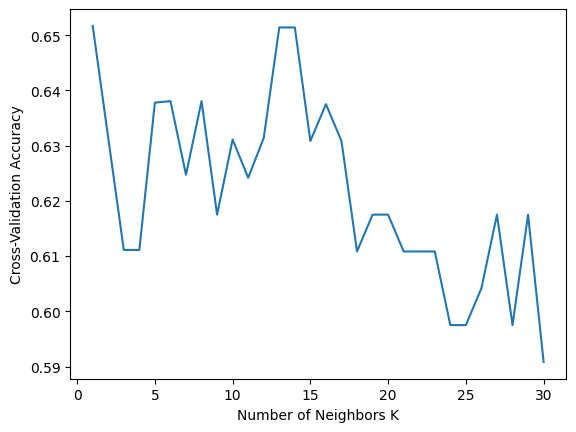

In [ ]:
# Plot the cross-validation scores for different values of k
import matplotlib.pyplot as plt
plt.plot(k_list, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [ ]:
# Build the KNN model again with the optimal value of k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Make predictions on the test set again
y_pred = knn.predict(X_test)

# Evaluate the model again using classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.79      0.79        19
           2       0.84      0.70      0.76        23
           3       0.60      0.75      0.67         4
           5       0.83      0.83      0.83         6
           6       0.33      0.67      0.44         3
           7       0.90      0.90      0.90        10

    accuracy                           0.77        65
   macro avg       0.72      0.77      0.73        65
weighted avg       0.80      0.77      0.78        65

[[15  2  2  0  0  0]
 [ 3 16  0  0  3  1]
 [ 1  0  3  0  0  0]
 [ 0  1  0  5  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  1  9]]
